# Лабораторная работа 2
### Выполнил: Агафонов Илья Игоревич

Добро пожаловать в лабораторную работу!
Оформите ваше решение контеста Kaggle в соответствии с этим шаблоном. Ваша задача - показать проверяющим ход ваших рассуждений, поэтому советуем писать много комментариев к коду и приводить комментарии к логике на каждом этапе в текстовых ячейках.
Где необходимо, используйте графики для большей наглядности.

При отправке поменяйте название файла на ваши ФИО!

### EDA (исследовательский анализ данных)

В этом разделе вам необходимо провести анализ вашего датасета, интерпретировать признаки, выяснить их значимость и исследовать зависимости между ними.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)

In [ ]:
data_train = pd.read_csv('DOTA2_TRAIN_features.csv')

In [ ]:
data_train_target = pd.read_csv('DOTA2_TRAIN_targets.csv')

In [ ]:
data_train_target.head()

,match_id,radiant_win
0,b29797296e310d2275f2cd67eeacf2eb,False
1,49908f2a11d8bc01f6dad6fbf2e39326,True
2,a68557919e4353f6067ddd3a04b980b0,True
3,f6273df443c5a8b192b633ef2ce34304,False
4,71b98e3c7cc8701ad425a69d3923ec8f,False


In [ ]:
data_train.shape

(27772, 246)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27772 entries, 0 to 27771
Columns: 246 entries, match_id to d5_sen_placed
dtypes: float64(35), int64(210), object(1)
memory usage: 52.1+ MB


In [ ]:
categorical_data = data_train.select_dtypes(include=['object'])
categorical_data

,match_id
0,b29797296e310d2275f2cd67eeacf2eb
1,49908f2a11d8bc01f6dad6fbf2e39326
2,a68557919e4353f6067ddd3a04b980b0
3,f6273df443c5a8b192b633ef2ce34304
4,71b98e3c7cc8701ad425a69d3923ec8f
...,...
27767,e72e4f287d02edbd8810c8fb3d3f08ee
27768,dc33aa0374dff2c15c4338e04d805c22
27769,f3768ec35c1e9d1f7a778cd4423d7cb5
27770,f90ccd819c43fcf5ec913b12b3ef5d52


Как видим из данных у нас только числовые признаки и столбец match_id, но это просто идентификатор

In [ ]:
data_train.columns[data_train.isnull().any()].tolist()

['r1_kills', 'r2_kills', 'r3_kills', 'r4_kills', 'r5_kills']

In [ ]:
data_train_target.columns[data_train_target.isnull().any()].tolist()

[]

In [ ]:
data_train[['r1_kills', 'r2_kills', 'r3_kills', 'r4_kills', 'r5_kills']].isnull().sum()

,0
r1_kills,2777
r2_kills,2777
r3_kills,2777
r4_kills,2777
r5_kills,2777


In [ ]:
2777 / len(data_train)

0.09999279850208843

Видим что примерно у нас 10 процентов пропусков, это не сильно критично

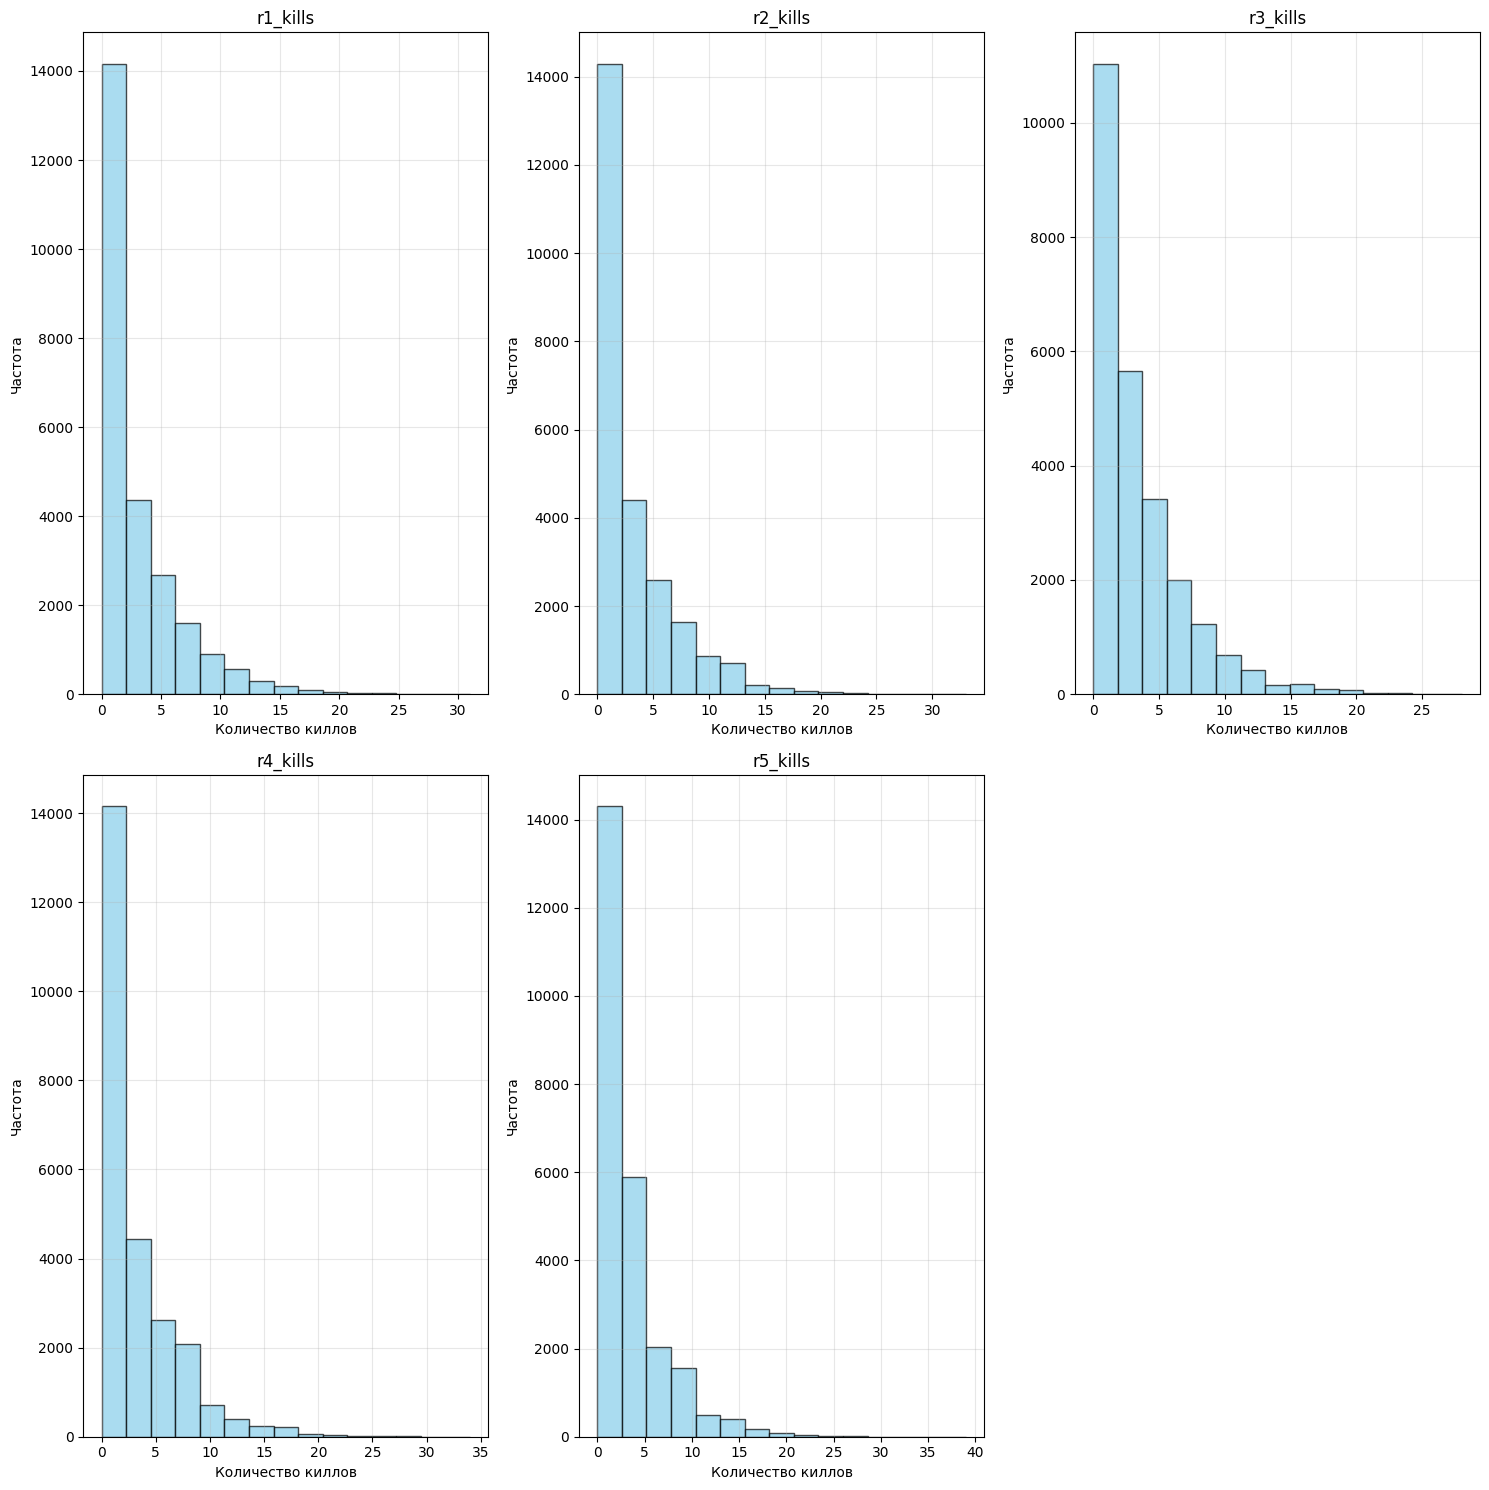

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

columns = ['r1_kills', 'r2_kills', 'r3_kills', 'r4_kills', 'r5_kills']

fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(columns):
    clean_data = data_train[col].dropna()
    axes[i].hist(clean_data, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Количество киллов')
    axes[i].set_ylabel('Частота')
    axes[i].grid(True, alpha=0.3)
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew
skewness = {}
for col in columns:
    clean_data = data_train[col].dropna()
    skewness[col] = skew(clean_data)

print("Скошенность:")
for col, skew_val in skewness.items():
    interpretation = "сильная правая" if skew_val > 1 else "правая" if skew_val > 0.5 else "симметричная" if -0.5 <= skew_val <= 0.5 else "левая" if skew_val < -0.5 else "сильная левая"
    print(f"{col}: {skew_val:.3f} ({interpretation} скошенность)")

Скошенность:
r1_kills: 1.915 (сильная правая скошенность)
r2_kills: 1.908 (сильная правая скошенность)
r3_kills: 1.826 (сильная правая скошенность)
r4_kills: 1.906 (сильная правая скошенность)
r5_kills: 1.911 (сильная правая скошенность)


/tmp/ipython-input-1250907229.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(boxplot_data, labels=columns, patch_artist=True, showfliers=True)


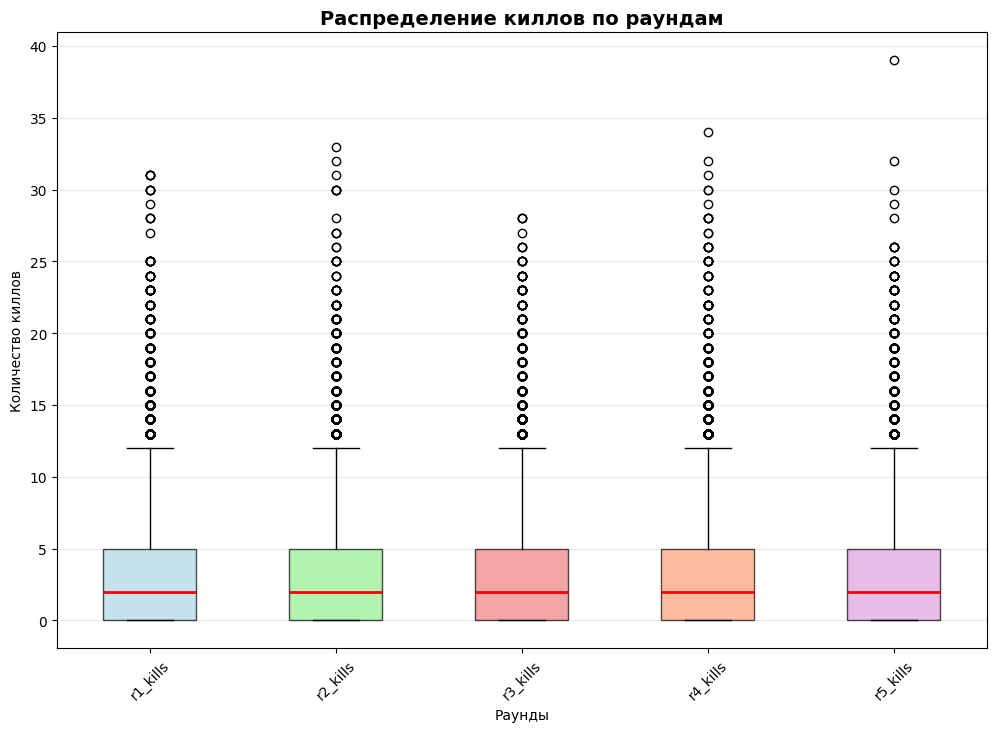

In [ ]:
plt.figure(figsize=(12, 8))
boxplot_data = [data_train[col].dropna() for col in columns]
box = plt.boxplot(boxplot_data, labels=columns, patch_artist=True, showfliers=True)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'plum']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
for median in box['medians']:
    median.set_color('red')
    median.set_linewidth(2)

plt.title('Распределение киллов по раундам', fontsize=14, fontweight='bold')
plt.ylabel('Количество киллов')
plt.xlabel('Раунды')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.show()

По boxplot'у видно что выбросы у каждого раунда примерно одинаковые

Посмотрим на сильно зависимые признаки

In [ ]:
threshold = 0.90

corr_matrix = data_train.drop(columns=['match_id']).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if upper.loc[row, col] > threshold
]

corr_features = []
for p in high_corr_pairs:
    print(p)
    corr_features.append(p)


corr_with_target = data_train.drop(columns=['match_id']).corrwith(data_train_target)

to_remove = set()

for col, row, corr_val in corr_features:
    if abs(corr_with_target[col]) < abs(corr_with_target[row]):
        to_remove.add(col)
    else:
        to_remove.add(row)

to_remove = list(to_remove)

print("Признаки, которые можно удалить, так как они сильно связаны:")
print(to_remove)
print(len(to_remove))



('r1_xp', 'r1_gold', np.float64(0.9525535183122035))
('r1_level', 'r1_gold', np.float64(0.9251431342973125))
('r1_level', 'r1_xp', np.float64(0.9734747457779226))
('r1_camps_stacked', 'r1_creeps_stacked', np.float64(0.9236885380022744))
('r2_level', 'r2_xp', np.float64(0.9730853002373449))
('r2_camps_stacked', 'r2_creeps_stacked', np.float64(0.9198161303268311))
('r3_level', 'r3_xp', np.float64(0.9732634401590082))
('r3_camps_stacked', 'r3_creeps_stacked', np.float64(0.9048259860656718))
('r4_xp', 'r4_gold', np.float64(0.9526309537897891))
('r4_level', 'r4_gold', np.float64(0.9261808214599735))
('r4_level', 'r4_xp', np.float64(0.9732942997269866))
('r4_camps_stacked', 'r4_creeps_stacked', np.float64(0.9198674557447964))
('r5_xp', 'r5_gold', np.float64(0.953618135832477))
('r5_level', 'r5_gold', np.float64(0.9274455041404389))
('r5_level', 'r5_xp', np.float64(0.9732917926362792))
('r5_camps_stacked', 'r5_creeps_stacked', np.float64(0.9264998607119881))
('d1_xp', 'd1_gold', np.float64(0.

Как видим 27 признаков можно удалить из датасета

### Preprocessing (подготовка данных)

Воспользуемя KNNImputer будем заменять пропуски на близкие значения у похожих соседей

In [ ]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
data_knn = data_train.copy()
data_knn[columns] = knn_imputer.fit_transform(data_train[columns])

Других пропусков больше нет, а обрабатывать отдельно каждый следующий признак не рационально так как их 245.

In [ ]:
data_train = data_knn.drop(columns=['match_id'])

In [ ]:
data_train_target = data_train_target.drop(columns=['match_id'])

In [ ]:
data_train = data_train.drop(columns=to_remove)

In [ ]:
data_train.shape

(27772, 218)

### Model & training (Выбор модели и её обучение)

В этом разделе описываете модель и ставите эксперименты по обучению.

Если вы ставили много экспериментов, приведите их в хронологическом порядке чтобы мы увидели эволюцию ваших рассуждений.

#### Эксперимент 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import time

X = data_train.astype(float)
y = data_train_target.astype(int).values.ravel()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=50)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

param_grid = {
    'feature_selector__k': [30, 50],
    'classifier__n_estimators': [150, 250],
    'classifier__max_depth': [12, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt']
}

gs = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=10,
    cv=2,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start_time = time.time()
gs.fit(X_train, y_train)
end_time = time.time()

best_model = gs.best_estimator_
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba))
print("Время:", end_time - start_time)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
ROC-AUC: 0.7481678231912395
Время: 354.44241738319397


#### Эксперимент 2

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import time

X = data_train
y = data_train_target
X = X.astype(float)
y = y.astype(int)
y = y.values.ravel() if hasattr(y, 'values') else y

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=70)),
    ('classifier', LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1))
])


param_grid = {
    'feature_selector__k': [50, 70, 100],
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [3, 5, 7, 10, -1],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__num_leaves': [31, 63, 127],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__reg_alpha': [0, 0.1, 1],
    'classifier__reg_lambda': [0, 0.1, 1],
    'classifier__class_weight': ['balanced', None]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


gs = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=30,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)


start_time = time.time()
gs.fit(X_train, y_train)
end_time = time.time()

best_pipeline = gs.best_estimator_

y_pred_proba = best_pipeline.predict_proba(X_val)[:, 1]
y_pred = best_pipeline.predict(X_val)

auc_score = roc_auc_score(y_val, y_pred_proba)
print(f" Лучшие параметры: {gs.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {gs.best_score_:.4f}")
print(f"ROC-AUC на валидационной выборке: {auc_score:.4f}")
print(f"Время обучения: {end_time - start_time:.2f} секунд")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
 Лучшие параметры: {'feature_selector__k': 100, 'classifier__subsample': 1.0, 'classifier__reg_lambda': 0.1, 'classifier__reg_alpha': 0.1, 'classifier__num_leaves': 31, 'classifier__n_estimators': 300, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.05, 'classifier__colsample_bytree': 0.8, 'classifier__class_weight': None}
Лучший ROC-AUC на кросс-валидации: 0.7792
ROC-AUC на валидационной выборке: 0.7905
Время обучения: 1573.12 секунд


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


#### Эксперимент 3

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import time

X = data_train.astype(float)
y = data_train_target.astype(int).values.ravel()

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = CatBoostClassifier(
    random_seed=42,
    verbose=0
)

grid = {
    'depth': [6, 8],
    'learning_rate': [0.03, 0.1],
    'iterations': [200, 400]
}

start_time = time.time()
result = model.grid_search(grid, X_train, y_train, verbose=False)
end_time = time.time()

best_model = model

y_pred_proba = best_model.predict_proba(X_val)[:, 1]
y_pred = best_model.predict(X_val)

print("Лучшие параметры:", result['params'])
print("ROC-AUC val:", roc_auc_score(y_val, y_pred_proba))
print("Время:", end_time - start_time)



bestTest = 0.5556781937
bestIteration = 199


bestTest = 0.5407196664
bestIteration = 197


bestTest = 0.5428247314
bestIteration = 399


bestTest = 0.5405837506
bestIteration = 202


bestTest = 0.5512135265
bestIteration = 199


bestTest = 0.5422794719
bestIteration = 181


bestTest = 0.5415872026
bestIteration = 399


bestTest = 0.5407287863
bestIteration = 259

Training on fold [0/3]

bestTest = 0.5380058523
bestIteration = 264

Training on fold [1/3]

bestTest = 0.5430979514
bestIteration = 220

Training on fold [2/3]

bestTest = 0.5455281502
bestIteration = 374

Лучшие параметры: {'depth': 6, 'learning_rate': 0.1, 'iterations': 400}
ROC-AUC val: 0.7989436726638806
Время: 281.40904426574707


Эксперимент 4(Градиентный бустинг)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import time
import numpy as np

X = data_train.astype(float)
y = data_train_target.astype(int).values.ravel()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=50)),
    ('classifier', HistGradientBoostingClassifier(random_state=42, max_bins=255))
])

param_grid = {
    'feature_selector__k': [30, 50],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.03, 0.1],
    'classifier__max_iter': [200, 400],
}

gs = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=12,
    cv=2,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start_time = time.time()
gs.fit(X_train, y_train)
end_time = time.time()

best_model_HGB = gs.best_estimator_

y_pred_proba = best_model_HGB.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_pred_proba)

print("Лучшие параметры:", gs.best_params_)
print("ROC-AUC val:", auc_score)
print("Время:", end_time - start_time)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Лучшие параметры: {'feature_selector__k': 50, 'classifier__max_iter': 200, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.03}
ROC-AUC val: 0.767419694492725
Время: 289.45417380332947


### Evaluation (оценка качества модели)

В этом разделе проводите оценку качества вашей итоговой модели.

Пока что BestModel это CatBoost

In [ ]:
data_test = pd.read_csv('DOTA2_TEST_features.csv')

In [ ]:
data_test.head()

,match_id,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
0,3071feff2631bd8ca93d0d182e5b9249,542,23,0,6,0,95,1,2,3,...,0.000,0,0,1,0,0.400,0,0,0,0
1,785b46a41ad7fc643b2fe870e18435e9,843,22,7,3,18,2,0,1,1,...,1.899,0,0,6,0,0.500,0,0,3,0
2,4856a3ccfd84dbd0ab25c0529815978e,491,22,0,1,4,18,0,0,1,...,1.500,0,0,0,0,0.333,0,0,0,0
3,bea45c19efef0f86c03a70280380185d,1167,22,7,4,0,41,4,0,4,...,0.000,0,0,9,0,0.714,0,0,1,0
4,77859b5baddd3a6d0cb05721d9494456,1032,22,7,5,0,84,2,2,4,...,15.263,1,1,1,0,0.600,0,0,0,0


In [ ]:
data_test.columns[data_test.isnull().any()].tolist()

[]

In [ ]:
match_id = data_test['match_id']

In [ ]:
data_test = data_test.drop(columns=['match_id'])
data_test

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
0,542,23,0,6,0,95,1,2,3,0,...,0.000,0,0,1,0,0.400,0,0,0,0
1,843,22,7,3,18,2,0,1,1,3,...,1.899,0,0,6,0,0.500,0,0,3,0
2,491,22,0,1,4,18,0,0,1,0,...,1.500,0,0,0,0,0.333,0,0,0,0
3,1167,22,7,4,0,41,4,0,4,14,...,0.000,0,0,9,0,0.714,0,0,1,0
4,1032,22,7,5,0,84,2,2,4,9,...,15.263,1,1,1,0,0.600,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,1793,22,0,10,4,27,5,8,5,6,...,1.533,0,0,13,0,0.480,0,0,8,2
11899,413,22,7,1,0,44,0,0,2,13,...,0.000,1,1,0,0,0.333,0,0,0,0
11900,153,22,7,0,2,21,0,0,0,0,...,0.000,0,0,0,0,0.000,0,0,0,0
11901,1457,22,7,10,3,8,2,10,8,7,...,0.000,0,0,7,0,0.655,1,0,0,1


In [ ]:
data_test = data_test.drop(columns=to_remove)

In [ ]:
y_test = best_model.predict_proba(data_test)[:, 1]

In [ ]:
y_test = pd.DataFrame({'match_id':match_id,'radiant_win':y_test})

In [ ]:
y_test.to_csv('submission.csv', index=False)

In [ ]:
sub = pd.read_csv('submission.csv')
sub

,match_id,radiant_win
0,3071feff2631bd8ca93d0d182e5b9249,0.358291
1,785b46a41ad7fc643b2fe870e18435e9,0.118941
2,4856a3ccfd84dbd0ab25c0529815978e,0.582700
3,bea45c19efef0f86c03a70280380185d,0.962924
4,77859b5baddd3a6d0cb05721d9494456,0.895396
...,...,...
11898,9b0cce52c76ccef65af5fecfd8cc9ea6,0.058933
11899,d7137c88b18462e86594a42154bac235,0.637481
11900,00608ab81cfcc97721f1f2d5d9bd0b51,0.527206
11901,dc05ff4cd96e7183f4c8df1086fc1b5a,0.470722


### Conclusion (Выводы)

В этом разделе описываете полученные результаты и проводите анализ выполненной работы.
Что получилось / не получилось и почему?

Самой лучшей моделью оказалась CatBoost, но даже после удаления сильно скоррелированных признаков, а их было 27, ROC-AUC был близок к 0.8.Возможно score увеличился при добавлении новых фич или изменении исходных.
RandomForest и другие градиентные бустинги показали менее хороший результат.